# WeatherPy
----

#### Analysis
* Based on the data we can see that there seems to be no true correlation between cloudiness and lattitude. Although there are some highlighted spots of cloudiness more so at 0% and 100% this could be resulting due to the limitations of the percentage points.
* Humidity within the DataFrame does not show to have a key impact in these cities, possibly due to the time of year that this data is being pulled and the more dry air for this time of year.
* The windspeed in most of these cities tend to stay on the lower side showing between 0-10 degrees. This could be due to a factor of lower humidity in the air.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

649

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build query URL 
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)

https://api.openweathermap.org/data/2.5/weather?appid=c478c9fc7283ac6a58b8865037bc7b36&units=Imperial&q=


In [4]:
# list
city_list = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

print("Beginning Data Retrieval")
print("-----------------------------")

count = 0
set_s = 1

#loop through the lsit of cities
for city in cities:


#put in set of 50  
    count += 1
    
    if count == 51:
        count = 1 
        set_s += 1
        
        
           
        
    print(f"Processing Record {count} of Set {set_s} | {city}") 

# get data  
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        

# append null values
    except KeyError:
        print("City not found. Skipping...")
        pass
        
        
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | carnarvon
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | bilma
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | jalpan
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | chuy
Processing Record 9 of Set 1 | isangel
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | nikolskoye
Processing Record 12 of Set 1 | dovolnoye
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | vavozh
Processing Record 15 of Set 1 | puerto escondido
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | norman wells
Processing Record 19 of Set 1 | bayanday
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | mandalgovi
Processing Record 22 of Set 1 | sinnamary
Processing Recor

Processing Record 38 of Set 4 | rakai
Processing Record 39 of Set 4 | ocolis
City not found. Skipping...
Processing Record 40 of Set 4 | capao da canoa
Processing Record 41 of Set 4 | flin flon
Processing Record 42 of Set 4 | rincon
Processing Record 43 of Set 4 | garissa
Processing Record 44 of Set 4 | upernavik
Processing Record 45 of Set 4 | tres arroyos
Processing Record 46 of Set 4 | mar del plata
Processing Record 47 of Set 4 | puerto palomas
Processing Record 48 of Set 4 | todos santos cuchumatan
Processing Record 49 of Set 4 | severo-kurilsk
Processing Record 50 of Set 4 | vestmannaeyjar
Processing Record 1 of Set 5 | esperance
Processing Record 2 of Set 5 | paamiut
Processing Record 3 of Set 5 | longyearbyen
Processing Record 4 of Set 5 | rio gallegos
Processing Record 5 of Set 5 | corinto
Processing Record 6 of Set 5 | vardo
Processing Record 7 of Set 5 | luan
Processing Record 8 of Set 5 | tairua
Processing Record 9 of Set 5 | santa isabel do rio negro
Processing Record 10 o

Processing Record 25 of Set 8 | minab
Processing Record 26 of Set 8 | victor harbor
Processing Record 27 of Set 8 | sinazongwe
Processing Record 28 of Set 8 | barawe
City not found. Skipping...
Processing Record 29 of Set 8 | emba
Processing Record 30 of Set 8 | dhandhuka
Processing Record 31 of Set 8 | acuna
City not found. Skipping...
Processing Record 32 of Set 8 | port hedland
Processing Record 33 of Set 8 | roman
Processing Record 34 of Set 8 | constitucion
Processing Record 35 of Set 8 | moose factory
Processing Record 36 of Set 8 | mahina
Processing Record 37 of Set 8 | vanimo
Processing Record 38 of Set 8 | djambala
Processing Record 39 of Set 8 | alyangula
Processing Record 40 of Set 8 | pali
Processing Record 41 of Set 8 | igrim
Processing Record 42 of Set 8 | isola del liri
Processing Record 43 of Set 8 | dawei
Processing Record 44 of Set 8 | tricase
Processing Record 45 of Set 8 | bathsheba
Processing Record 46 of Set 8 | port macquarie
Processing Record 47 of Set 8 | pingl

Processing Record 11 of Set 12 | oktyabrskiy
Processing Record 12 of Set 12 | nathdwara
Processing Record 13 of Set 12 | hamirpur
Processing Record 14 of Set 12 | bloemfontein
Processing Record 15 of Set 12 | jiaonan
Processing Record 16 of Set 12 | udachnyy
Processing Record 17 of Set 12 | bulungu
Processing Record 18 of Set 12 | tsumeb
Processing Record 19 of Set 12 | amga
Processing Record 20 of Set 12 | korla
Processing Record 21 of Set 12 | vilyuysk
Processing Record 22 of Set 12 | esperantina
Processing Record 23 of Set 12 | inverness
Processing Record 24 of Set 12 | sayville
Processing Record 25 of Set 12 | stolin
Processing Record 26 of Set 12 | riyadh
Processing Record 27 of Set 12 | tilichiki
Processing Record 28 of Set 12 | coquimbo
Processing Record 29 of Set 12 | burnie
Processing Record 30 of Set 12 | huilong
Processing Record 31 of Set 12 | khingansk
Processing Record 32 of Set 12 | sakakah
Processing Record 33 of Set 12 | quixada
Processing Record 34 of Set 12 | domoni


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = pd.DataFrame ({
                            "City": city_list,
                            "Lat": lat,
                            "Lng": lng,
                            "Max Temp": max_temp,
                            "Humidity": humidity,
                            "Cloudiness": cloudiness,
                            "Wind Speed": wind_speed,
                            "Country": country,
                            "Date": date
})

weather_dict.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Carnarvon,-24.8667,113.6333,72.36,48,0,19.69,AU,1666752973
1,Tuktoyaktuk,69.4541,-133.0374,12.20,92,75,13.80,CA,1666752973
2,Bilma,18.6853,12.9164,68.14,16,0,6.24,NE,1666752974
3,Hobart,-42.8794,147.3294,59.27,98,75,14.97,AU,1666752975
4,Jalpan,21.2333,-99.4833,66.00,66,91,2.35,MX,1666752975


In [6]:
weather_dict.to_csv("output_data/weather_dict.csv", index=False)


In [7]:
weather_dict.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,5.890000e+02
mean,18.630976,18.264065,59.710798,73.932088,60.125637,7.284329,1.666753e+09
std,33.454674,91.518126,19.947691,20.002265,40.257815,5.126516,1.010582e+02
min,-54.800000,-179.166700,-6.300000,12.000000,0.000000,0.000000,1.666753e+09
25%,-10.068100,-66.382100,48.650000,64.000000,18.000000,3.440000,1.666753e+09
50%,22.566700,23.266700,63.210000,78.000000,75.000000,6.240000,1.666753e+09
75%,47.076800,98.200000,75.580000,89.000000,100.000000,10.000000,1.666753e+09
max,78.218600,178.416700,103.980000,100.000000,100.000000,29.910000,1.666753e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#cities over 100 humidity
humidity_over = weather_dict.loc[weather_dict["Humidity"] >= 100].count()
humidity_over

City          10
Lat           10
Lng           10
Max Temp      10
Humidity      10
Cloudiness    10
Wind Speed    10
Country       10
Date          10
dtype: int64

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_dict.drop(humidity_over, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Carnarvon,-24.8667,113.6333,72.36,48,0,19.69,AU,1666752973
1,Tuktoyaktuk,69.4541,-133.0374,12.20,92,75,13.80,CA,1666752973
2,Bilma,18.6853,12.9164,68.14,16,0,6.24,NE,1666752974
3,Hobart,-42.8794,147.3294,59.27,98,75,14.97,AU,1666752975
4,Jalpan,21.2333,-99.4833,66.00,66,91,2.35,MX,1666752975


In [10]:
clean_city_data.to_csv("output_data/clean.csv", index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

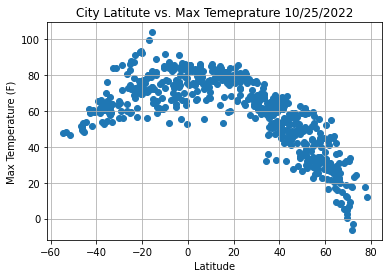

In [11]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Max Temp"]

plt.scatter(x_values,y_values)

plt.title("City Latitute vs. Max Temeprature 10/25/2022")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig("output_data/latvstemp.png")
plt.show()

#### We can tell by this graph that there are not sever outliers showing. The temperature peaks near the equator and dips in the northern hemisphere and stays warmer in the souther hemisphere at this time of year,

## Latitude vs. Humidity Plot

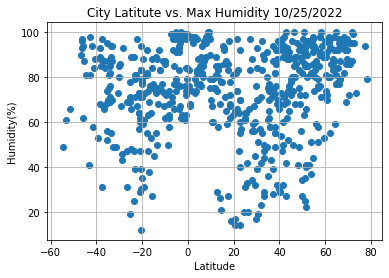

In [12]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Humidity"]

plt.scatter(x_values,y_values)

plt.title("City Latitute vs. Max Humidity 10/25/2022")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.grid()
plt.savefig("output_data/latvshumidity.png")
plt.show()

#### We can see that the vast majority of citities is showing  humidity  above 60 no matter the latitude.

## Latitude vs. Cloudiness Plot

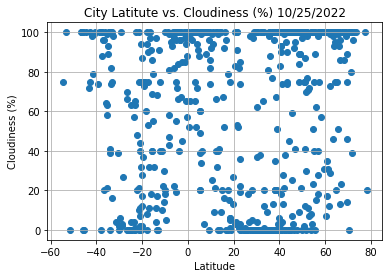

In [13]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Cloudiness"]

plt.scatter(x_values,y_values)

plt.title("City Latitute vs. Cloudiness (%) 10/25/2022")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("output_data/latvscloudiness.png")
plt.show()

#### Cloudiness tends to stand out at either 0% or 100% in a lot of cities and does not relate to the latitude.

## Latitude vs. Wind Speed Plot

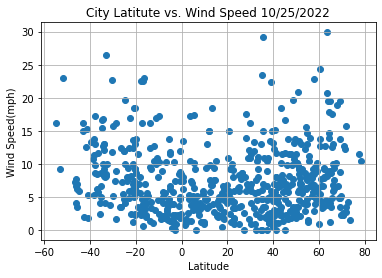

In [14]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Wind Speed"]

plt.scatter(x_values,y_values)

plt.title("City Latitute vs. Wind Speed 10/25/2022")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.grid()
plt.savefig("output_data/latvswindspeed.png")
plt.show()

#### Wind speed in all regions of the world tend to stay at a lower speed. This would only spike if there was a cause for it to. When this data was taken it looks calm for the most part.

## Linear Regression

In [15]:
north_hemisphere = clean_city_data.loc[clean_city_data["Lat"] > 0]

south_hemisphere = clean_city_data.loc[clean_city_data["Lat"] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

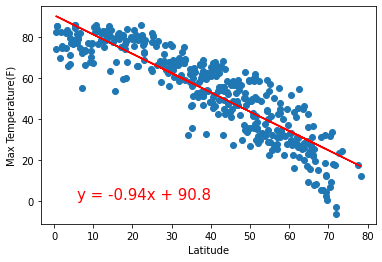

The r-value is: -0.882399748729072


In [16]:
x_values = north_hemisphere['Lat']
y_values = north_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.savefig("output_data/latvsmaxtemp_N2.png")
plt.show()
print(f"The r-value is: {rvalue}")

#### Here we are modeling the Max Temp to the Latitude. We can tell that it gets colder in the cities the further we are away from the equator.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

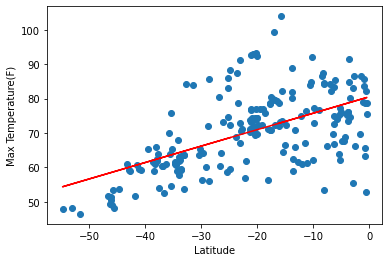

The r-value is: 0.5685635332252079


In [17]:
x_values = south_hemisphere['Lat']
y_values = south_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.savefig("output_data/latvsmaxtemp_S2.png")
plt.show()
print(f"The r-value is: {rvalue}")

#### Here we are modeling the Max Temp to the Latitude just like above. We can tell that it gets warmer in the cities that are becoming closer to the equator. As we can tell though, these data points are a little spread out more than above. This might be due to the random cities that were pulled and the geographic location. We can also tell that there are less cities in the southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

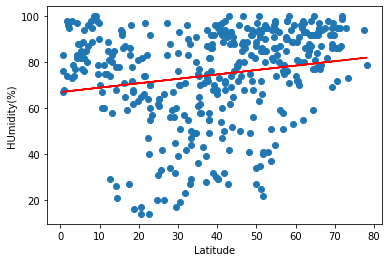

The r-value is: 0.18222896806861982


In [18]:
x_values = north_hemisphere['Lat']
y_values = north_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('HUmidity(%)')
plt.savefig("output_data/latvshumidity_N2.png")
plt.show()
print(f"The r-value is: {rvalue}")

#### Here we can tell that the Humidity is highlighted the most between 60-100 but there is no real corelation between humidity % and latitude.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

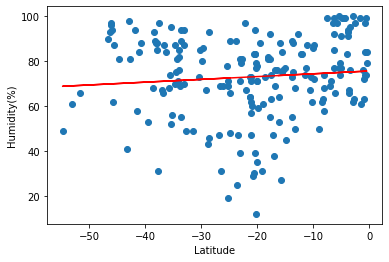

The r-value is: 0.0910090169439801


In [19]:
x_values = south_hemisphere['Lat']
y_values = south_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.savefig("output_data/latvshumidity_S2.png")
plt.show()
print(f"The r-value is: {rvalue}")

#### Just like above we can tell that latitude did not play a major role in the humidity of the air in these cities. It does tend to look more spread out between -20 and -30 degrees.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

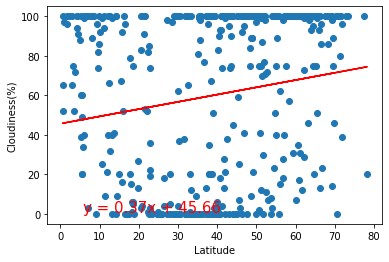

The r-value is: 0.17514154727507278


In [20]:
x_values = north_hemisphere['Lat']
y_values = north_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.savefig("output_data/latvscloudiness_N2.png")
plt.show()
print(f"The r-value is: {rvalue}")

#### latitude has more of an effect between 20-50 degrees for 0 clouds and ranges from 0-80 degrees for for 100% cloudiness. But just like in our analysis it could be due to scaling. It is still quite random. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

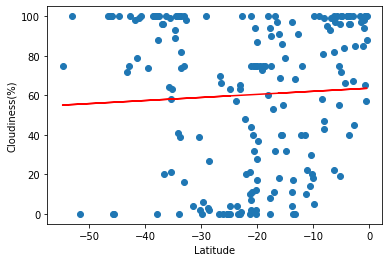

The r-value is: 0.05515884852213007


In [21]:
x_values = south_hemisphere['Lat']
y_values = south_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.savefig("output_data/latvscloudiness_S2.png")
plt.show()
print(f"The r-value is: {rvalue}")

#### we can tell that just like in our analysis there is no real corelation from clouds to latitude. it is pretty spread out other than a rise at -20-30 at 0 clouds and a jump at -40 for 100% clouds and 0 to -10 at 100% clouds.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

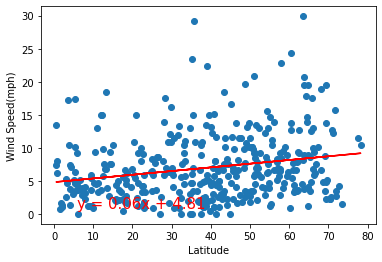

The r-value is: 0.21998819286846807


In [22]:
x_values = north_hemisphere['Lat']
y_values = north_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.savefig("output_data/latvswindspeed_N2.png")
plt.show()
print(f"The r-value is: {rvalue}")

#### wind speed tends to stay lower  between 0-15 mph  no matter the latitude and would tend to only spike if there was a storm or hurricane/tornado.. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

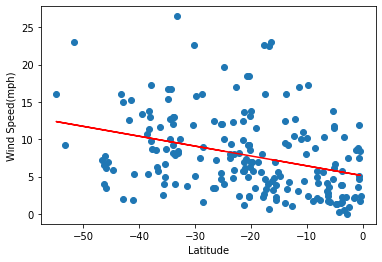

The r-value is: -0.33411091428297623


In [23]:
x_values = south_hemisphere['Lat']
y_values = south_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.savefig("output_data/latvswindspeed_S2.png")
plt.show()
print(f"The r-value is: {rvalue}")

#### We can tell that windspeed again tends to stay between 0-15 mph no matter what the latitude is. This can shift if a storm were to come by or Hurrican/Tornado in these regions of the world.